## Firstly, I have  converted all categories (category 1, category 2,category 3, category 4) into single training dataset (train).

In [1]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion

TRAIN_DIR = r'C:\Users\DELL\Desktop\train'
TEST_DIR = r'C:\Users\DELL\Desktop\test'
IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'Multiclass_classification-{}-{}.model'.format(LR, '2conv-basic') # 

In [2]:
def label_img(img):
    
    word_label = img[0:10]
    # conversion to one-hot array [category 1, category 2,category 3, category 4] 

    if word_label == 'category 1': return [1,0,0,0]
                         
    elif word_label == 'category 2': return [0,1,0,0]
    
    elif word_label == 'category 3': return [0,0,1,0]
    
    elif word_label == 'category 4': return [0,0,0,1]

In [3]:
training_data = []
for img in tqdm(os.listdir(TRAIN_DIR)):
    label = label_img(img)
    #print(label)
    path = os.path.join(TRAIN_DIR,img)
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    training_data.append([np.array(img),np.array(label)])

np.save('train_data.npy', training_data)
print(len(training_data))

train_data = training_data
print(len(train_data))

100%|████████████████████████████████████████████████████████████████████████████████| 440/440 [00:05<00:00, 84.52it/s]


440
440


In [6]:
shuffle(train_data)# mixing up or currently ordered data that might lead our network astray in training.
#print(train_data)

In [7]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

test_data = process_test_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 92.11it/s]


In [8]:
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression   
import tensorflow as tf 

tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 
  
model = tflearn.DNN(convnet) 

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [9]:
train = train_data[:-40]
test = train_data[-40:]

In [10]:
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
Y = [i[1] for i in train] 
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
test_y = [i[1] for i in test] 

In [11]:
model.fit({'input': X}, {'targets': Y}, n_epoch = 10,  
    validation_set =({'input': test_x}, {'targets': test_y}),  
    snapshot_step = 500, show_metric = True, run_id = MODEL_NAME) 
model.save(MODEL_NAME) 

Training Step: 69  | total loss: 0.21622 | time: 1.870s
| Adam | epoch: 010 | loss: 0.21622 - acc: 0.9276 -- iter: 384/400
Training Step: 70  | total loss: 0.20025 | time: 3.133s
| Adam | epoch: 010 | loss: 0.20025 - acc: 0.9342 | val_loss: 0.22369 - val_acc: 0.9500 -- iter: 400/400
--
INFO:tensorflow:C:\Users\DELL\Desktop\Image_2\Image_2\Code\Multiclass_classification-0.001-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


## Accuracy = 95%

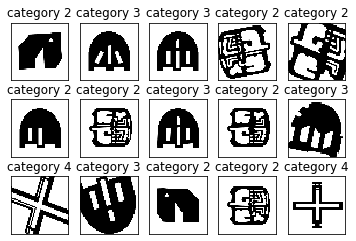

In [20]:
import matplotlib.pyplot as plt 
test_data = np.load('test_data.npy')
fig=plt.figure()

#print(len(test_data))

for num, data in enumerate(test_data[:15]):  
    # category 1: [1,0,0,0]
    # category 2: [0,1,0,0]
    # category 3: [0,0,1,0]
    # category 4: [0,0,0,1]
      
    img_num = data[1] 
    img_data = data[0] 
      
    y = fig.add_subplot(3, 5, num + 1) 
    orig = img_data 
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1) 
  
    model_out = model.predict([data])[0] 
    #print(model_out)
    
    if np.argmax(model_out) == 0: str_label ='category 2'
    elif np.argmax(model_out) == 1: str_label ='category 2'
    elif np.argmax(model_out) == 2: str_label ='category 3'
    elif np.argmax(model_out) == 3: str_label ='category 4'      
          
    y.imshow(orig, cmap ='gray') 
    plt.title(str_label) 
    y.axes.get_xaxis().set_visible(False) 
    y.axes.get_yaxis().set_visible(False) 
plt.show() 